In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("./assets/avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


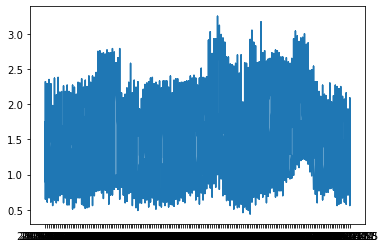

In [8]:
data_sorted = data.sort_values(by="Date")

x = data_sorted["Date"]
y = data_sorted["AveragePrice"]

plt.plot(x,y)

In [4]:
avotypes = data.groupby(by="type").mean()
avotypes.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


<BarContainer object of 2 artists>

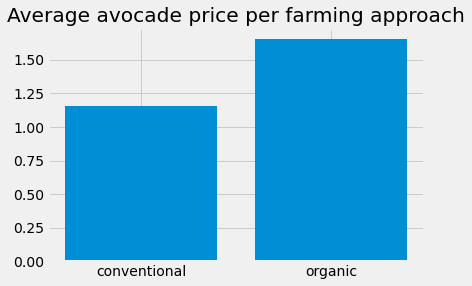

In [16]:
x = ["conventional", "organic"]
y = avotypes["AveragePrice"]

plt.style.use("fivethirtyeight")
plt.title("Average avocade price per farming approach")

plt.bar(x,y)

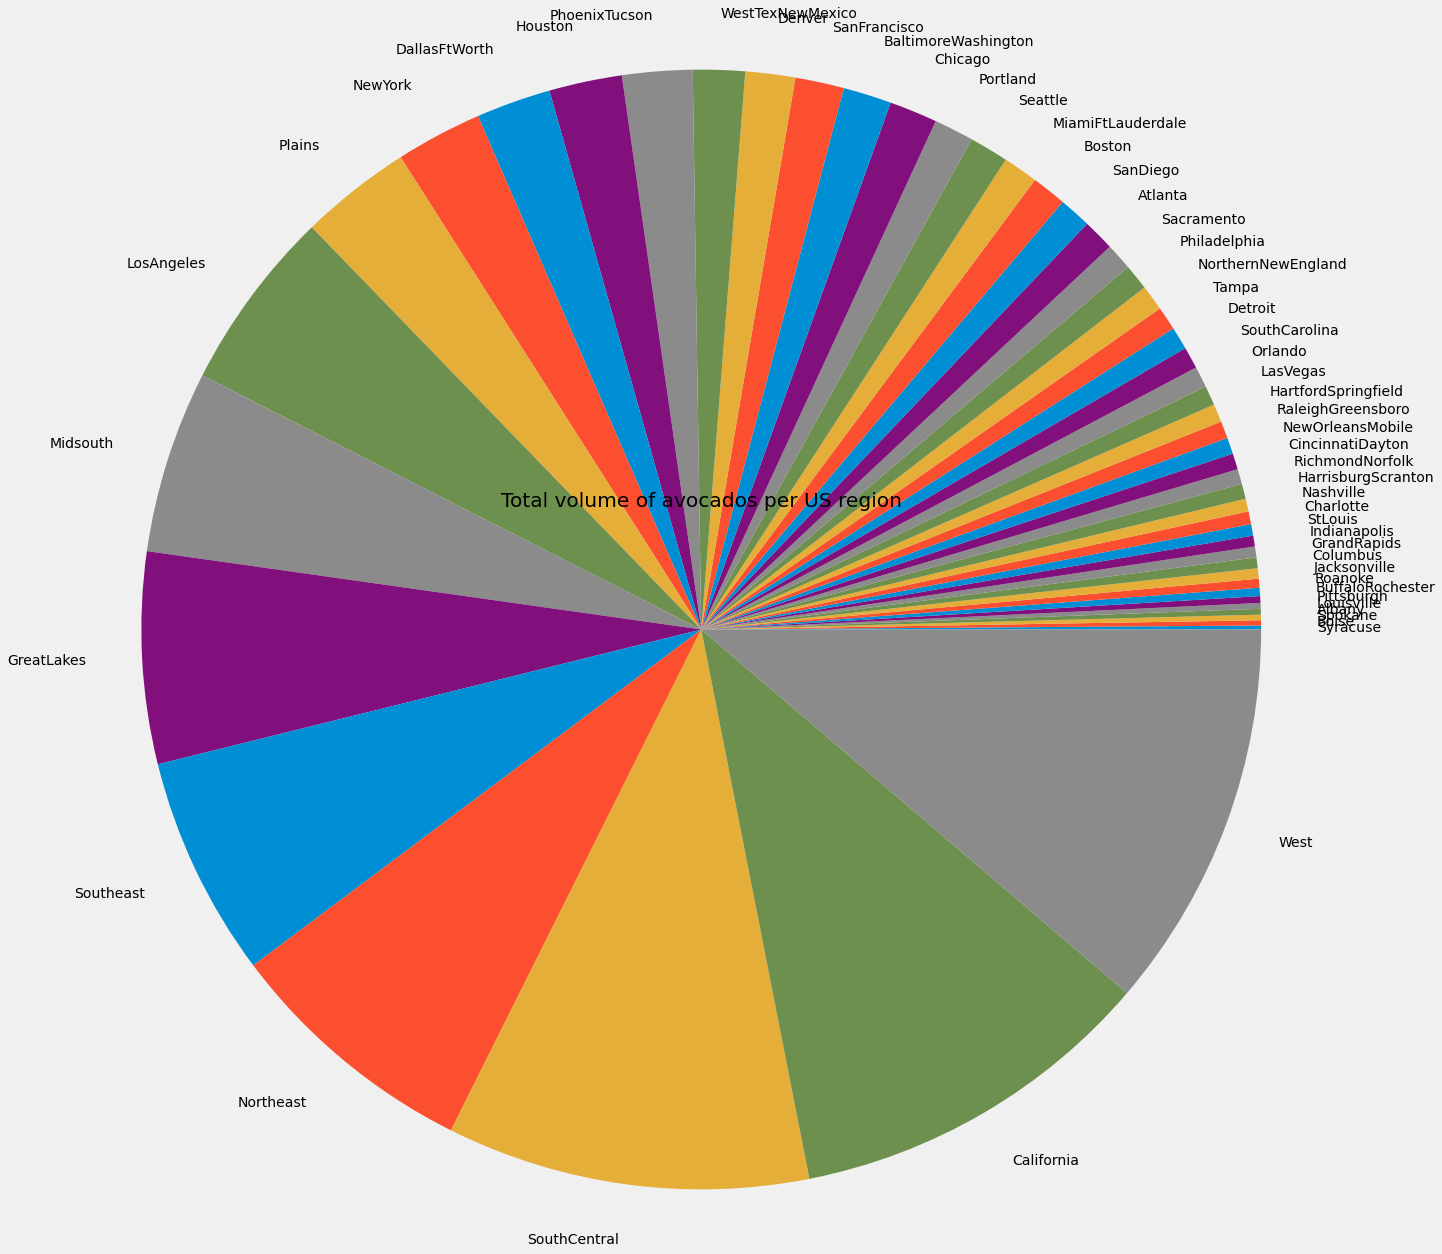

,region,Total Volume
0,Syracuse,10942667.68
1,Boise,14413187.75
2,Spokane,15565275.48
3,Albany,16067799.97
4,Louisville,16097002.40


In [123]:
regional_volume = data[["region", "Total Volume"]]
regionVol = regional_volume.groupby(by="region").sum().sort_values("Total Volume")
regionVol.reset_index(level=0, inplace=True)
withoutTotal = regionVol["region"]!="TotalUS"
regionVol = regionVol[withoutTotal]
plt.pie(regionVol["Total Volume"], radius=6, labels=regionVol["region"])
plt.title("Total volume of avocados per US region")
#plt.legend(regionVol["region"], loc="upper left", bbox_to_anchor=(2.2,3))
plt.show()
regionVol.head()

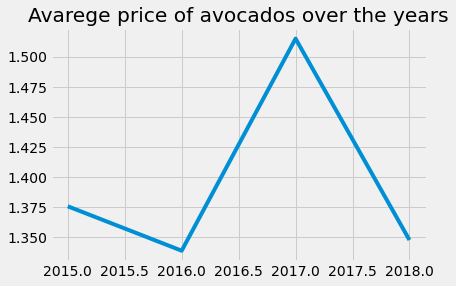

In [54]:
avperyear = data[["AveragePrice", "year"]]
plt.title("Avarege price of avocados over the years")
plt.plot(avperyear.groupby(by="year").mean())